# 练习 3-1

为MNIST训练一个分类器，并在测试集上达到97%的精度。

- KNeighborsClassifier对这个任务非常有效，你只需要找到合适的超参数值即可

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
# 下载MNIST数据集
mnist = fetch_openml('mnist_784')
mnist

{&#39;data&#39;: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 &#39;target&#39;: array([&#39;5&#39;, &#39;0&#39;, &#39;4&#39;, ..., &#39;4&#39;, &#39;5&#39;, &#39;6&#39;], dtype=object),
 &#39;frame&#39;: None,
 &#39;categories&#39;: {},
 &#39;feature_names&#39;: [&#39;pixel1&#39;,
  &#39;pixel2&#39;,
  &#39;pixel3&#39;,
  &#39;pixel4&#39;,
  &#39;pixel5&#39;,
  &#39;pixel6&#39;,
  &#39;pixel7&#39;,
  &#39;pixel8&#39;,
  &#39;pixel9&#39;,
  &#39;pixel10&#39;,
  &#39;pixel11&#39;,
  &#39;pixel12&#39;,
  &#39;pixel13&#39;,
  &#39;pixel14&#39;,
  &#39;pixel15&#39;,
  &#39;pixel16&#39;,
  &#39;pixel17&#39;,
  &#39;pixel18&#39;,
  &#39;pixel19&#39;,
  &#39;pixel20&#39;,
  &#39;pixel21&#39;,
  &#39;pixel22&#39;,
  &#39;pixel23&#39;,
  &#39;pixel24&#39;,
  &#39;pixel25&#39;,
  &#39;pixel26&#39

In [3]:
mnist_data = mnist['data']
mnist_label = mnist['target'].astype(np.uint8)
len(mnist_data), len(mnist_label)

(70000, 70000)

In [4]:
X_train, y_train, X_test, y_test = mnist_data[:60000], mnist_label[:60000], mnist_data[60000:], mnist_label[60000:]
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

&lt;matplotlib.image.AxesImage at 0x7ffe48ed2790&gt;

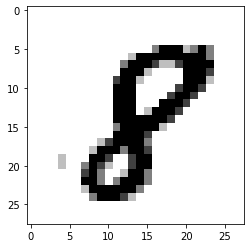

In [5]:
# 无论合适都要养成对数据进行清洗的好习惯
shuffled_index = np.random.permutation(len(X_train))
X_train, y_train = X_train[shuffled_index], y_train[shuffled_index]

some_digit = X_train[10]
some_digit_label = y_train[10]

plt.imshow(some_digit.reshape(28, 28), cmap=matplotlib.cm.binary)

In [6]:
some_digit_label

8

In [7]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf

KNeighborsClassifier()

In [8]:
#cross_val_score(knn_clf, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9688

## 使用网络搜索找到最佳的参数

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
param_grid=[{
    'weights': ['uniform', 'distance'],
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9],
    'algorithm': ['ball_tree', 'kd_tree', 'brute']
}]
grid_search = GridSearchCV(knn_clf, param_grid, cv=3, verbose=3, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_score_, grid_search.best_params_

In [ ]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

## 对模型进行更多探索

In [ ]:
# 说先把网格搜索出来的比较好的模型实例化出来
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

### 混淆矩阵
#### 1. 计算混淆矩阵

In [ ]:
y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

#### 2. 可视化混淆矩阵

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/row_sums
norm_conf_mx

In [ ]:
np.fill_diagonal(norm_conf_mx, 0) #对角线填充为0
plt.figure(figsize=(8, 8))
plt.matshow(norm_conf_mx, cmap= plt.cm.gray)
plt.show()

### 计算Precision/Recall
#### 1. 计算Precision和Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score
y_pred = knn_clf.predict(X_test)



In [ ]:
precision_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro')